In [1]:
import pandas as pd
import numpy as np

In [2]:
mordredpc = pd.read_csv("NCV_models_MordredPC.csv")

In [3]:
mfpmaccs = pd.read_csv("NCV_models_MfpMACCS.csv")

In [4]:
mordredpcmfpmaccs = pd.read_csv("NCV_models_MfpMACCSMordredPhyscochemical.csv")

In [5]:
liv = pd.read_csv("NCV_models_Livdataonly.csv")

In [6]:
allfeatures = pd.read_csv("NCV_models_all_features.csv")

In [7]:
df = pd.concat([allfeatures, mordredpc, mfpmaccs, mordredpcmfpmaccs, liv]).reset_index(drop=True)
#df["BA"] = (df["Sensitivity"] +df["Sensitivity"] )/2
df

NCV  DILI   i  split        ba       mcc  Sensitivity  Specificity  \
0    NCV  DILI  42      0  0.619741  0.232736     0.584615     0.654867   
1    NCV  DILI  42      1  0.660028  0.289709     0.705882     0.614173   
2    NCV  DILI  42      2  0.638189  0.266291     0.692308     0.584071   
3    NCV  DILI  42      3  0.686072  0.371429     0.719512     0.652632   
4    NCV  DILI  42      4  0.580975  0.160071     0.492308     0.669643   
..   ...   ...  ..    ...       ...       ...          ...          ...   
270  NCV  DILI  52      0  0.615684  0.220478     0.645161     0.586207   
271  NCV  DILI  52      1  0.615653  0.225427     0.525424     0.705882   
272  NCV  DILI  52      2  0.587433  0.172071     0.529412     0.645455   
273  NCV  DILI  52      3  0.646812  0.293086     0.594595     0.699029   
274  NCV  DILI  52      4  0.596566  0.220678     0.353846     0.839286   

          auc        f1    pos_LR       ppv  average_precision_score  \
0    0.661538  0.691589  1.693886  0.732673                 0.744211   
1    0.696001  0.709091  1.829532  0.838710                 0.841051   
2    0.675017  0.663317  1.664484  0.767442                 0.762697   
3    0.715661  0.688889  2.071323  0.729412                 0.704815   
4    0.659066  0.681818  1.490229  0.694444                 0.761440   
..        ...       ...       ...       ...                      ...   
270  0.636123  0.660194  1.559140  0.755556                 0.756578   
271  0.666572  0.727273  1.786441  0.750000                 0.774093   
272  0.603610  0.666667  1.493213  0.689320                 0.676310   
273  0.683023  0.702439  1.975588  0.705882                 0.744243   
274  0.707830  0.758065  2.201709  0.691176                 0.828063   

                                       Features  
0    Morgan, Mordred, Phisicochemical, Liv data  
1    Morgan, Mordred, Phisicochemical, Liv data  
2    Morgan, Mordred, Phisicochemical, Liv data  
3    Morgan, Mordred, Phisicochemical, Liv data  
4    Morgan, Mordred, Phisicochemical, Liv data  
..                                          ...  
270                               Liv data only  
271                               Liv data only  
272                               Liv data only  
273                               Liv data only  
274                               Liv data only  

[275 rows x 14 columns]

In [8]:
df.to_csv("NCV_models_compiled.csv", index=False)

In [9]:
df.groupby("Features").mean()

i  split        ba       mcc  \
Features                                                                      
Liv data only                               47.0    2.0  0.611056  0.222280   
MfpMACCS                                    47.0    2.0  0.625230  0.246663   
MordredPC                                   47.0    2.0  0.636788  0.267582   
Morgan, MACCS, Mordred, Phisicochemical     47.0    2.0  0.633772  0.261215   
Morgan, Mordred, Phisicochemical, Liv data  47.0    2.0  0.642435  0.277087   

                                            Sensitivity  Specificity  \
Features                                                               
Liv data only                                  0.556042     0.666069   
MfpMACCS                                       0.600839     0.649621   
MordredPC                                      0.612476     0.661100   
Morgan, MACCS, Mordred, Phisicochemical        0.611224     0.656321   
Morgan, Mordred, Phisicochemical, Liv data     0.642130     0.642741   

                                                 auc        f1    pos_LR  \
Features                                                                   
Liv data only                               0.658358  0.687788  1.774509   
MfpMACCS                                    0.680429  0.685737  1.777392   
MordredPC                                   0.678866  0.698935  1.832813   
Morgan, MACCS, Mordred, Phisicochemical     0.678993  0.694646  1.806669   
Morgan, Mordred, Phisicochemical, Liv data  0.681644  0.691417  1.841774   

                                                 ppv  average_precision_score  
Features                                                                       
Liv data only                               0.721393                 0.756529  
MfpMACCS                                    0.738064                 0.764472  
MordredPC                                   0.747285                 0.764701  
Morgan, MACCS, Mordred, Phisicochemical     0.744647                 0.764448  
Morgan, Mordred, Phisicochemical, Liv data  0.755170                 0.764704

In [10]:
df.groupby("Features").mean().to_csv("NCV_models_compiled_mean.csv")

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [13]:
from statannotations.Annotator import Annotator

In [14]:
df.Features.unique()

array(['Morgan, Mordred, Phisicochemical, Liv data', 'MordredPC',
       'MfpMACCS', 'Morgan, MACCS, Mordred, Phisicochemical',
       'Liv data only'], dtype=object)

ba
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:7.057e-09 t=-6.856e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:6.075e-03 t=-2.856e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:3.886e-02 t=-2.117e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:7.253e-04 t=-3.585e+00


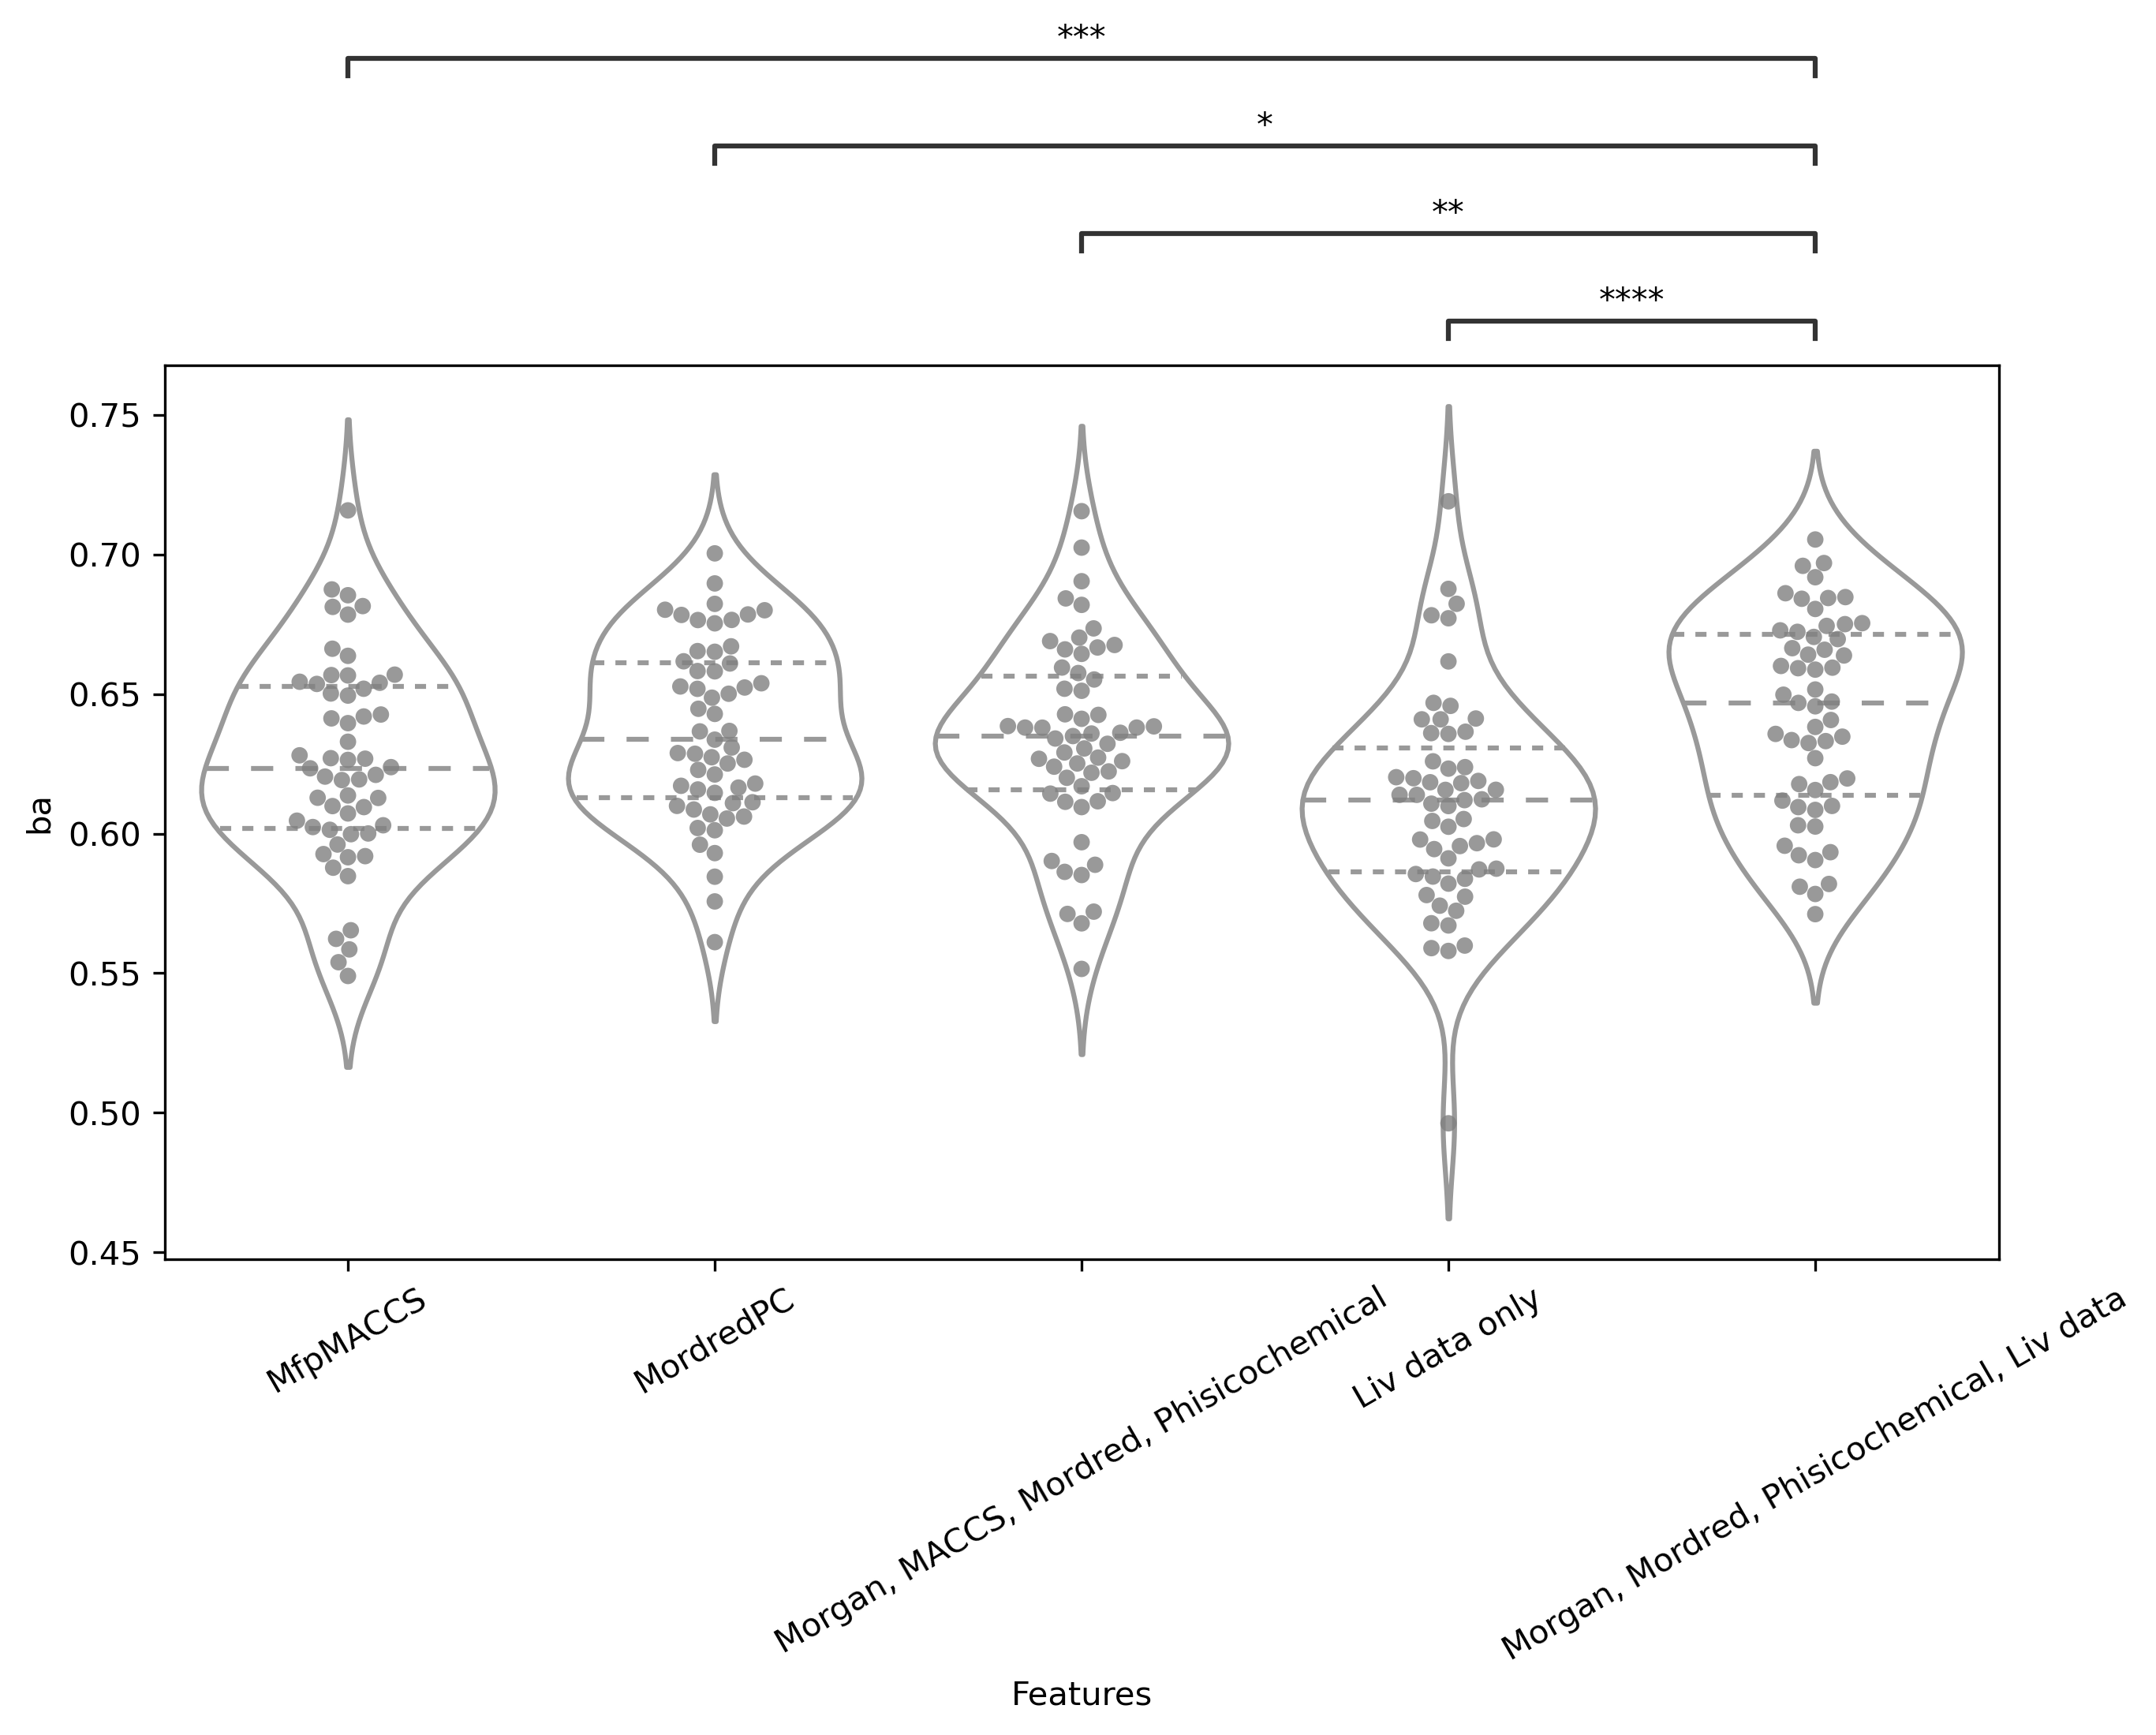

auc
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:7.673e-06 t=-4.949e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:5.884e-02 t=-1.930e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:9.376e-02 t=-1.706e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:6.949e-01 t=-3.942e-01


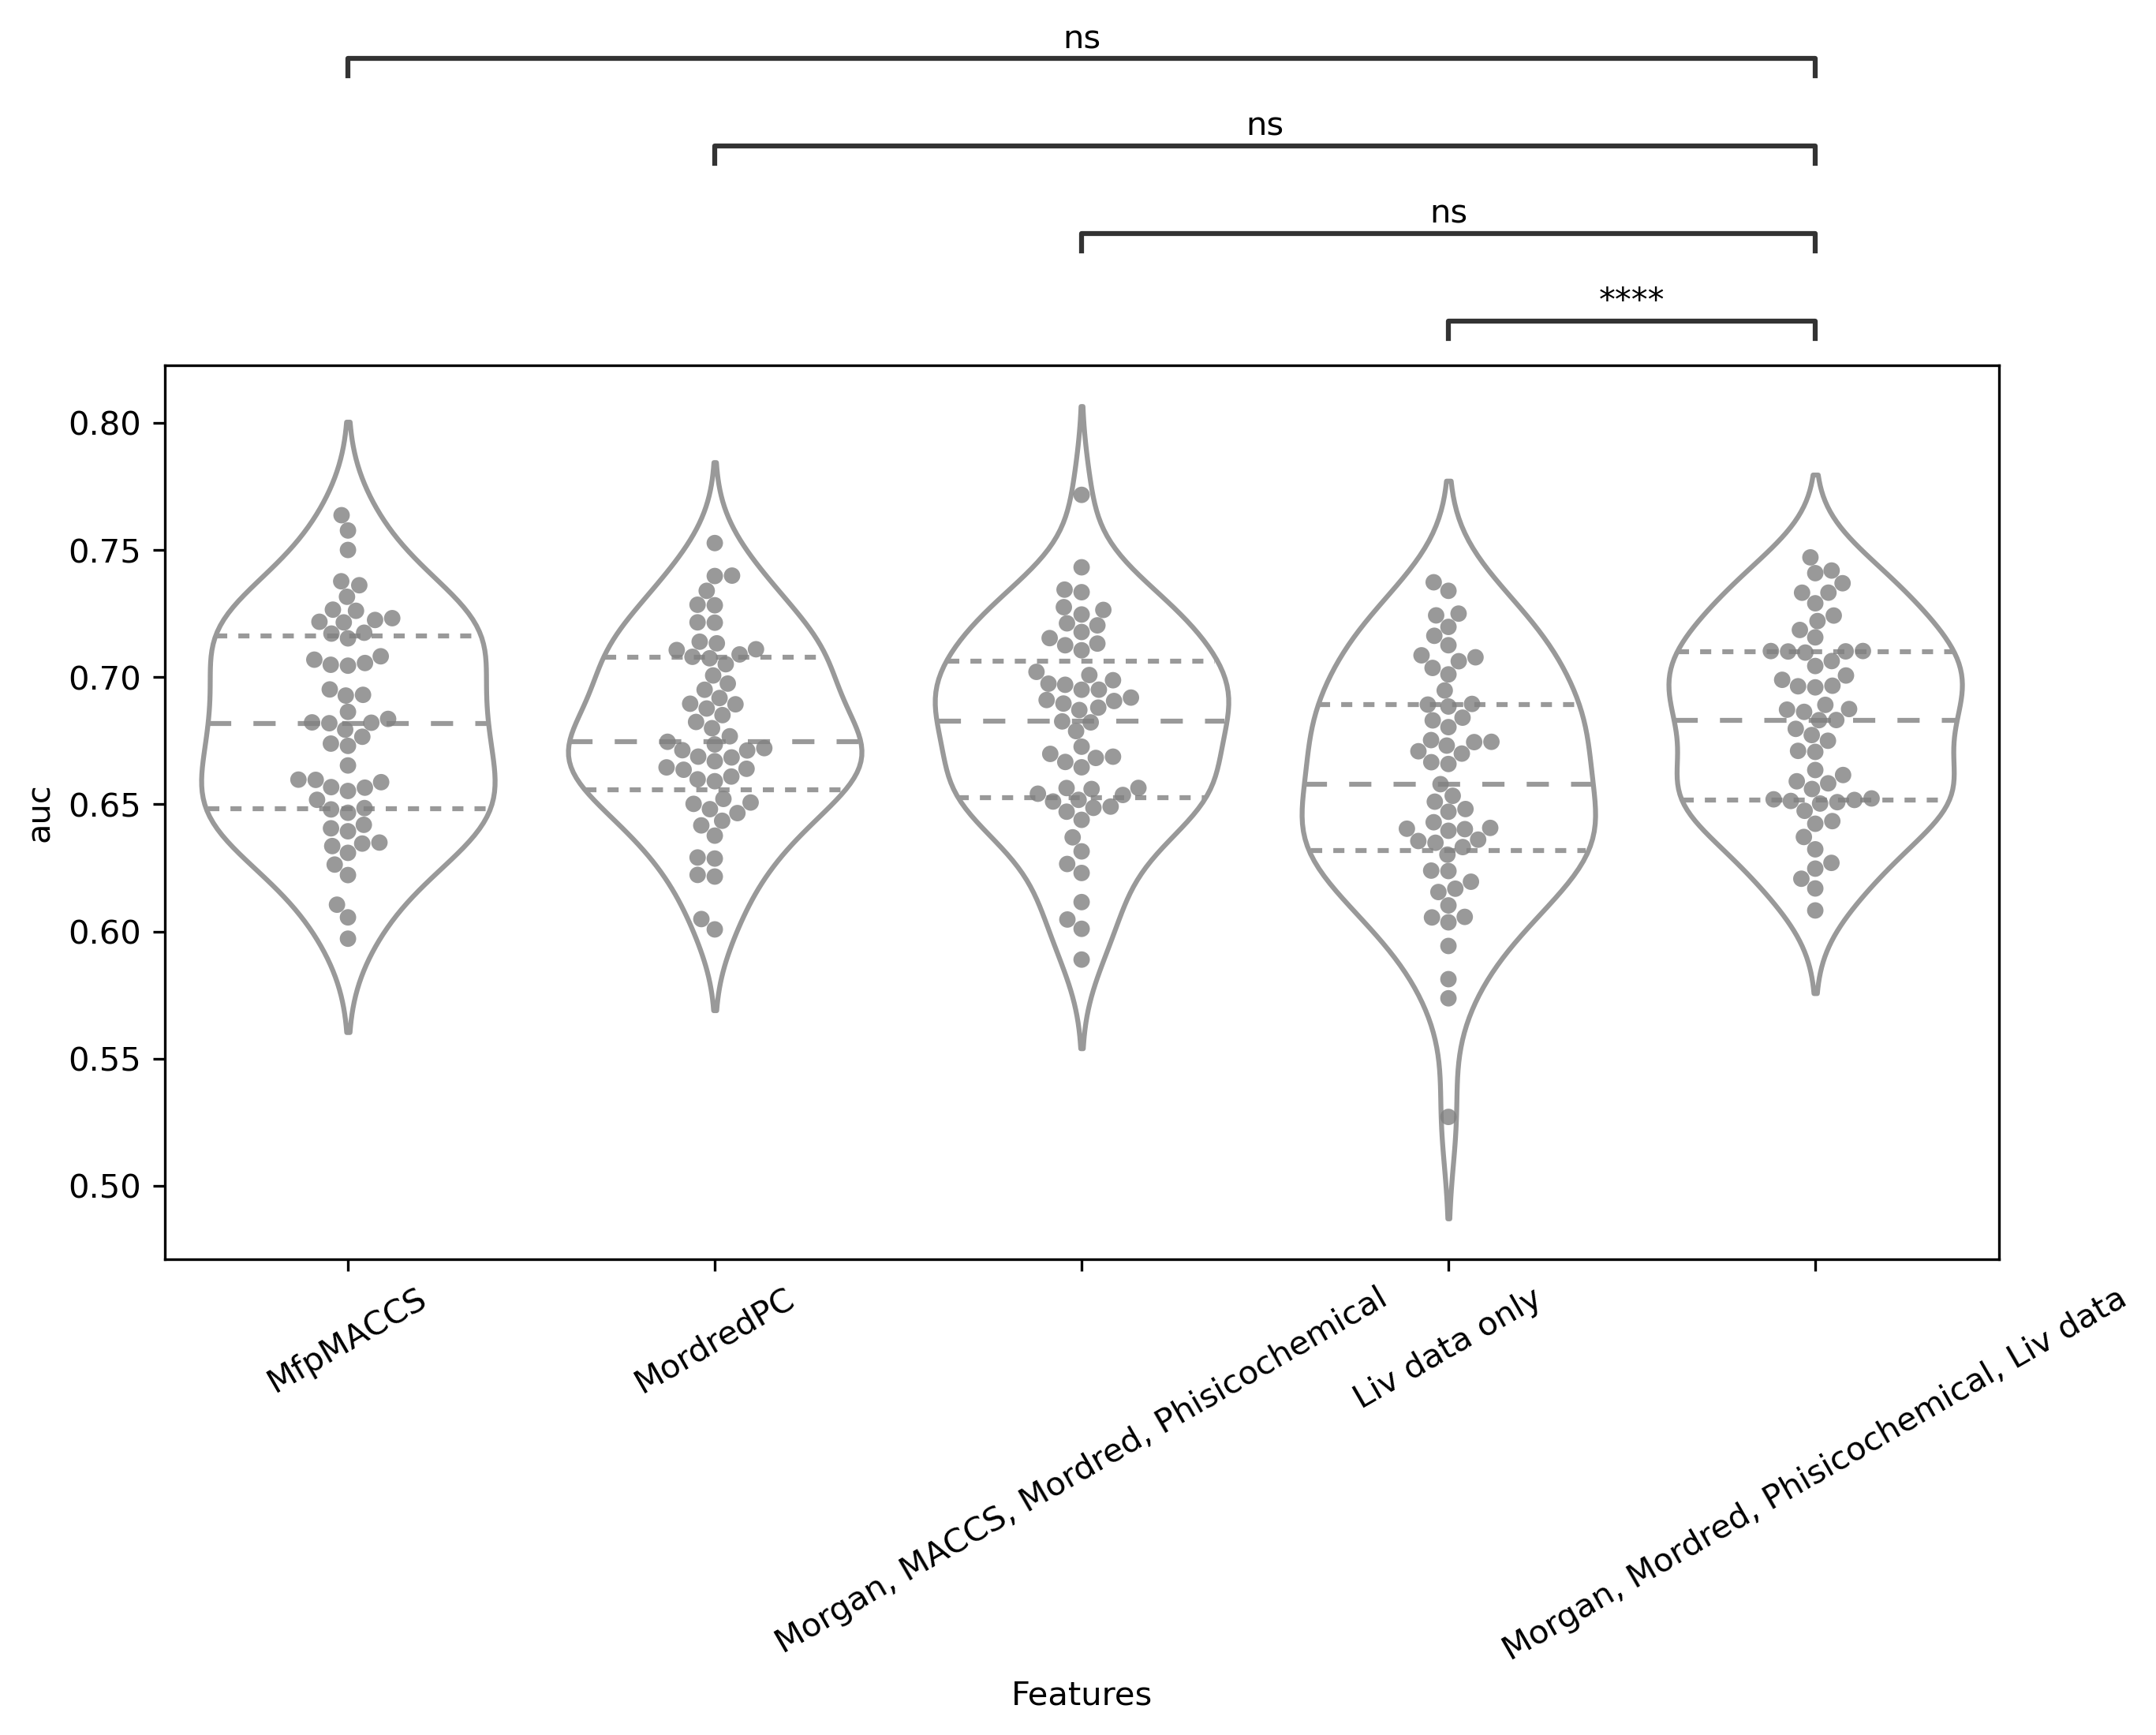

mcc
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:7.566e-08 t=-6.220e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:8.723e-03 t=-2.722e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:6.701e-02 t=-1.869e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.712e-03 t=-3.301e+00


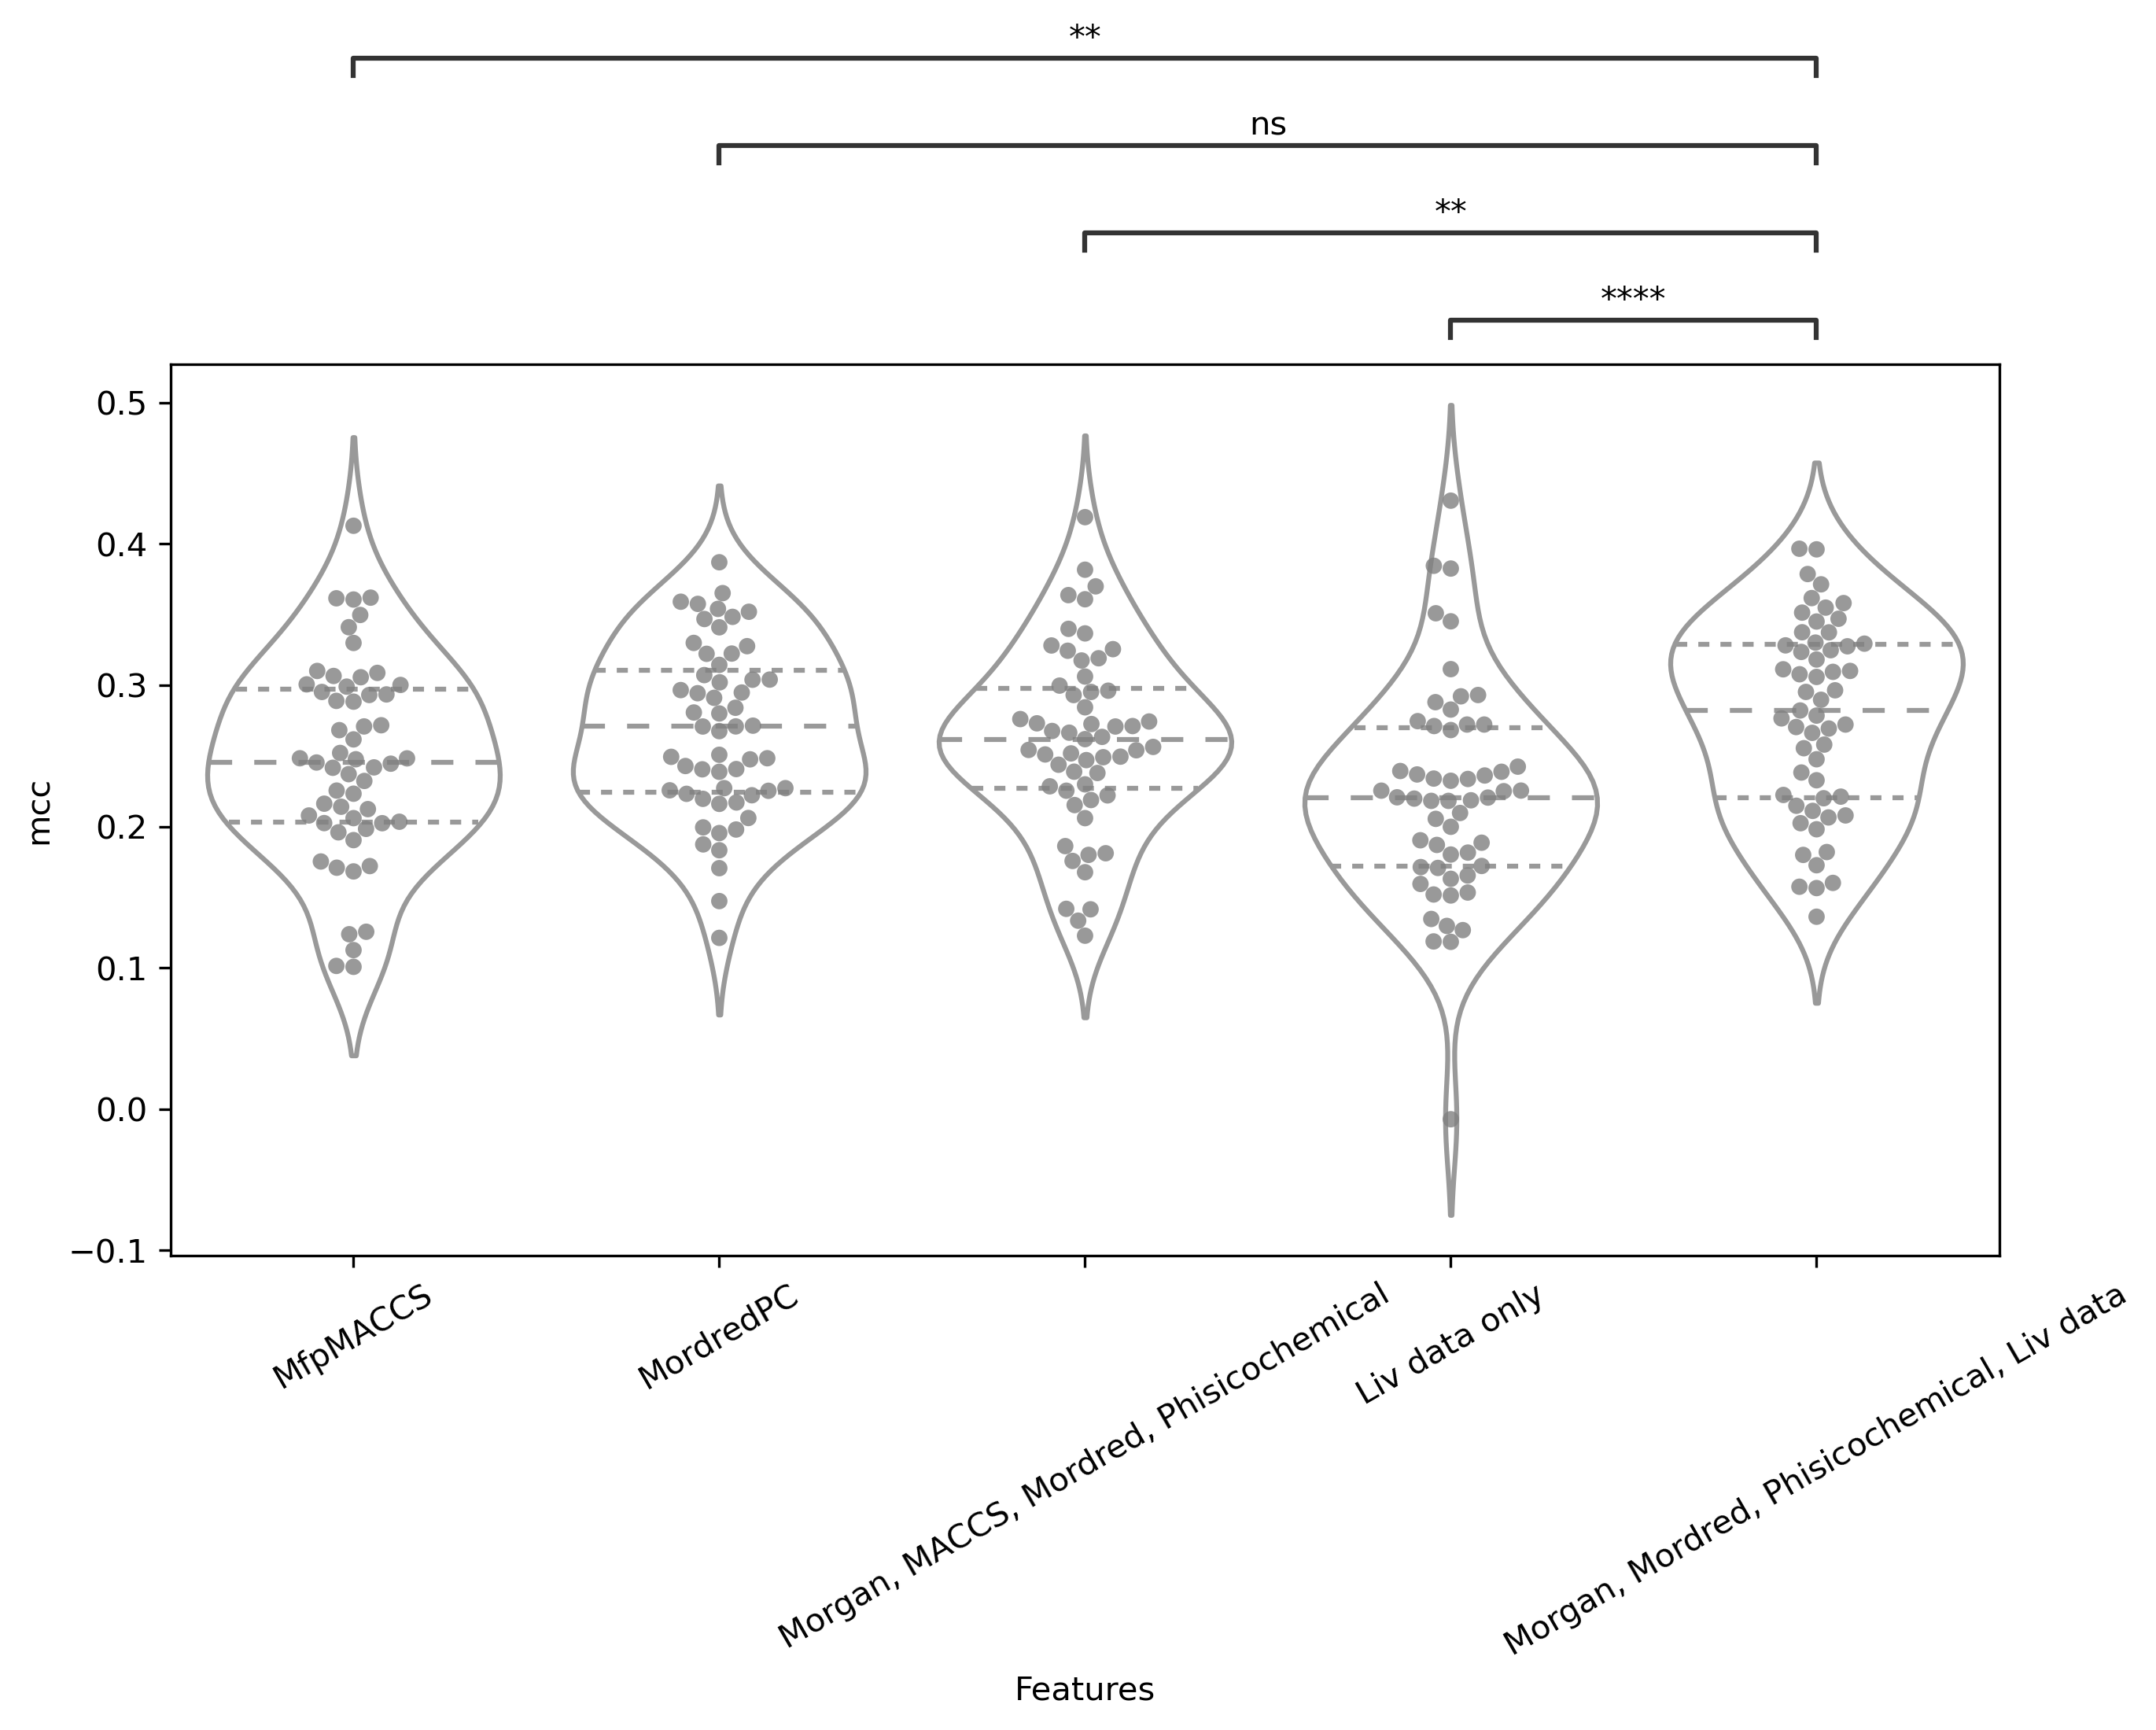

Sensitivity
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.380e-06 t=-5.429e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:7.297e-03 t=-2.789e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:4.619e-03 t=-2.955e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.585e-02 t=-2.491e+00


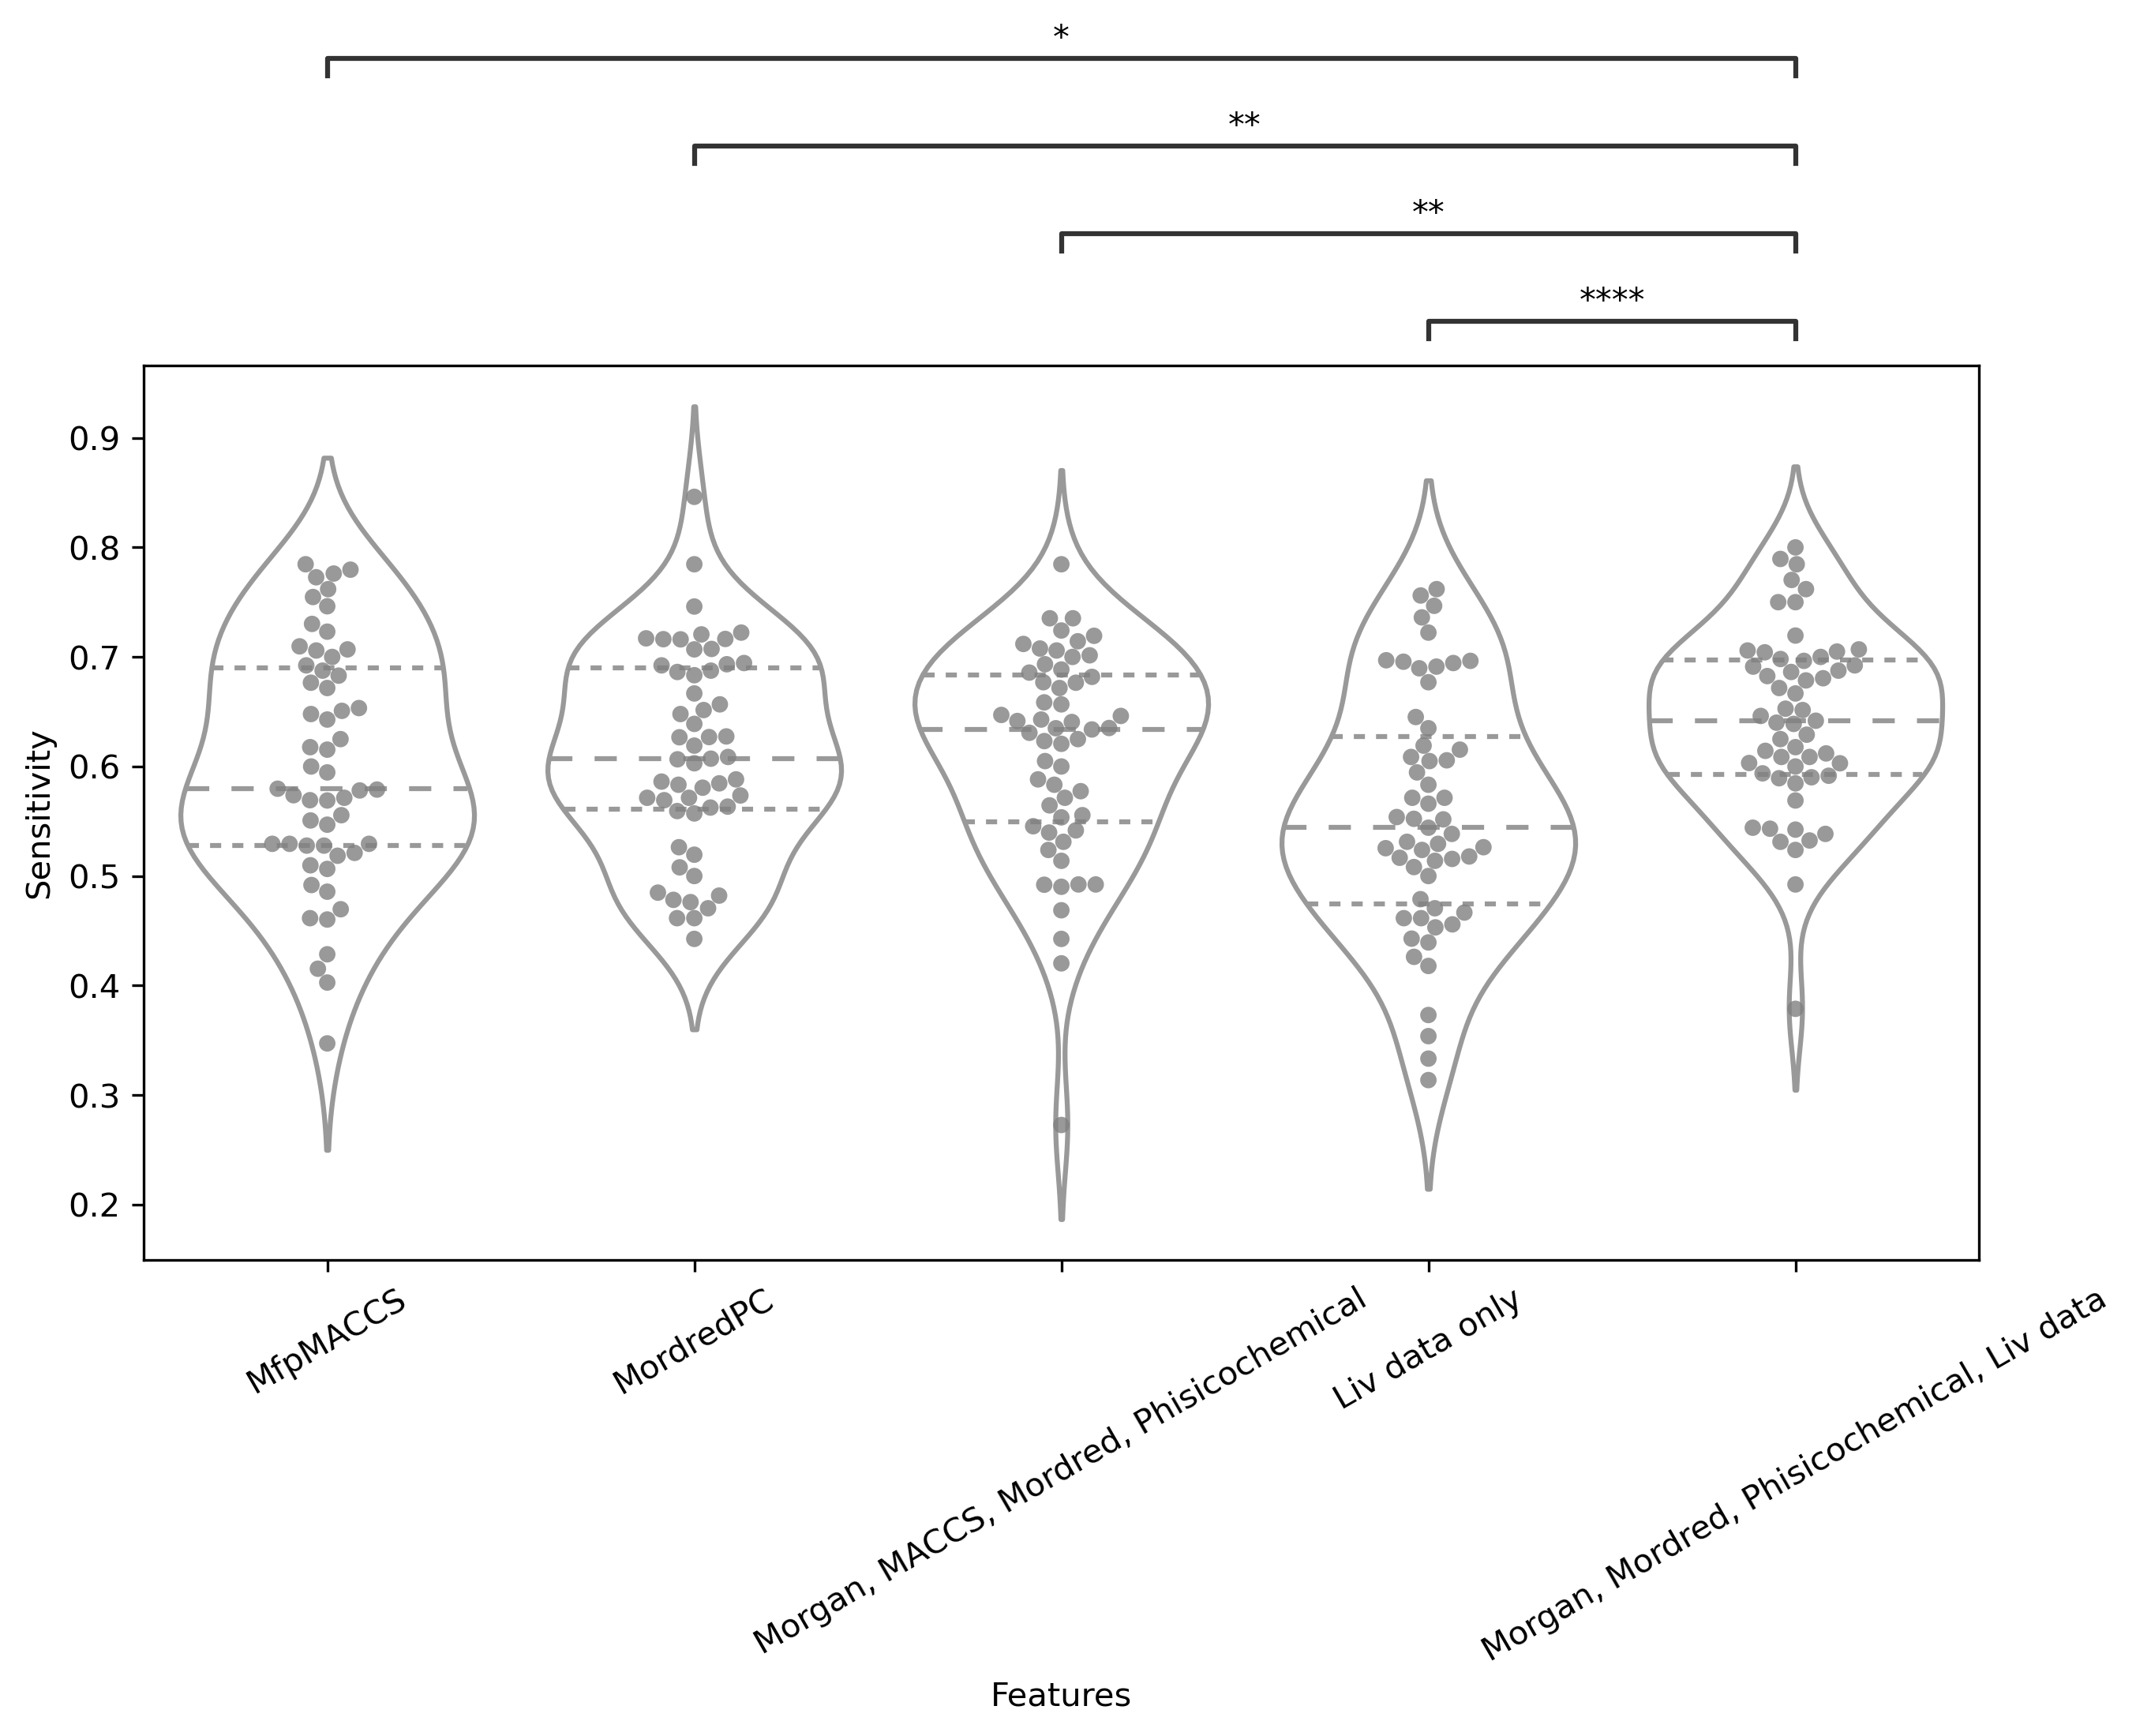

Specificity
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.572e-01 t=1.434e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.955e-01 t=1.311e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:5.490e-02 t=1.962e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:6.122e-01 t=5.100e-01


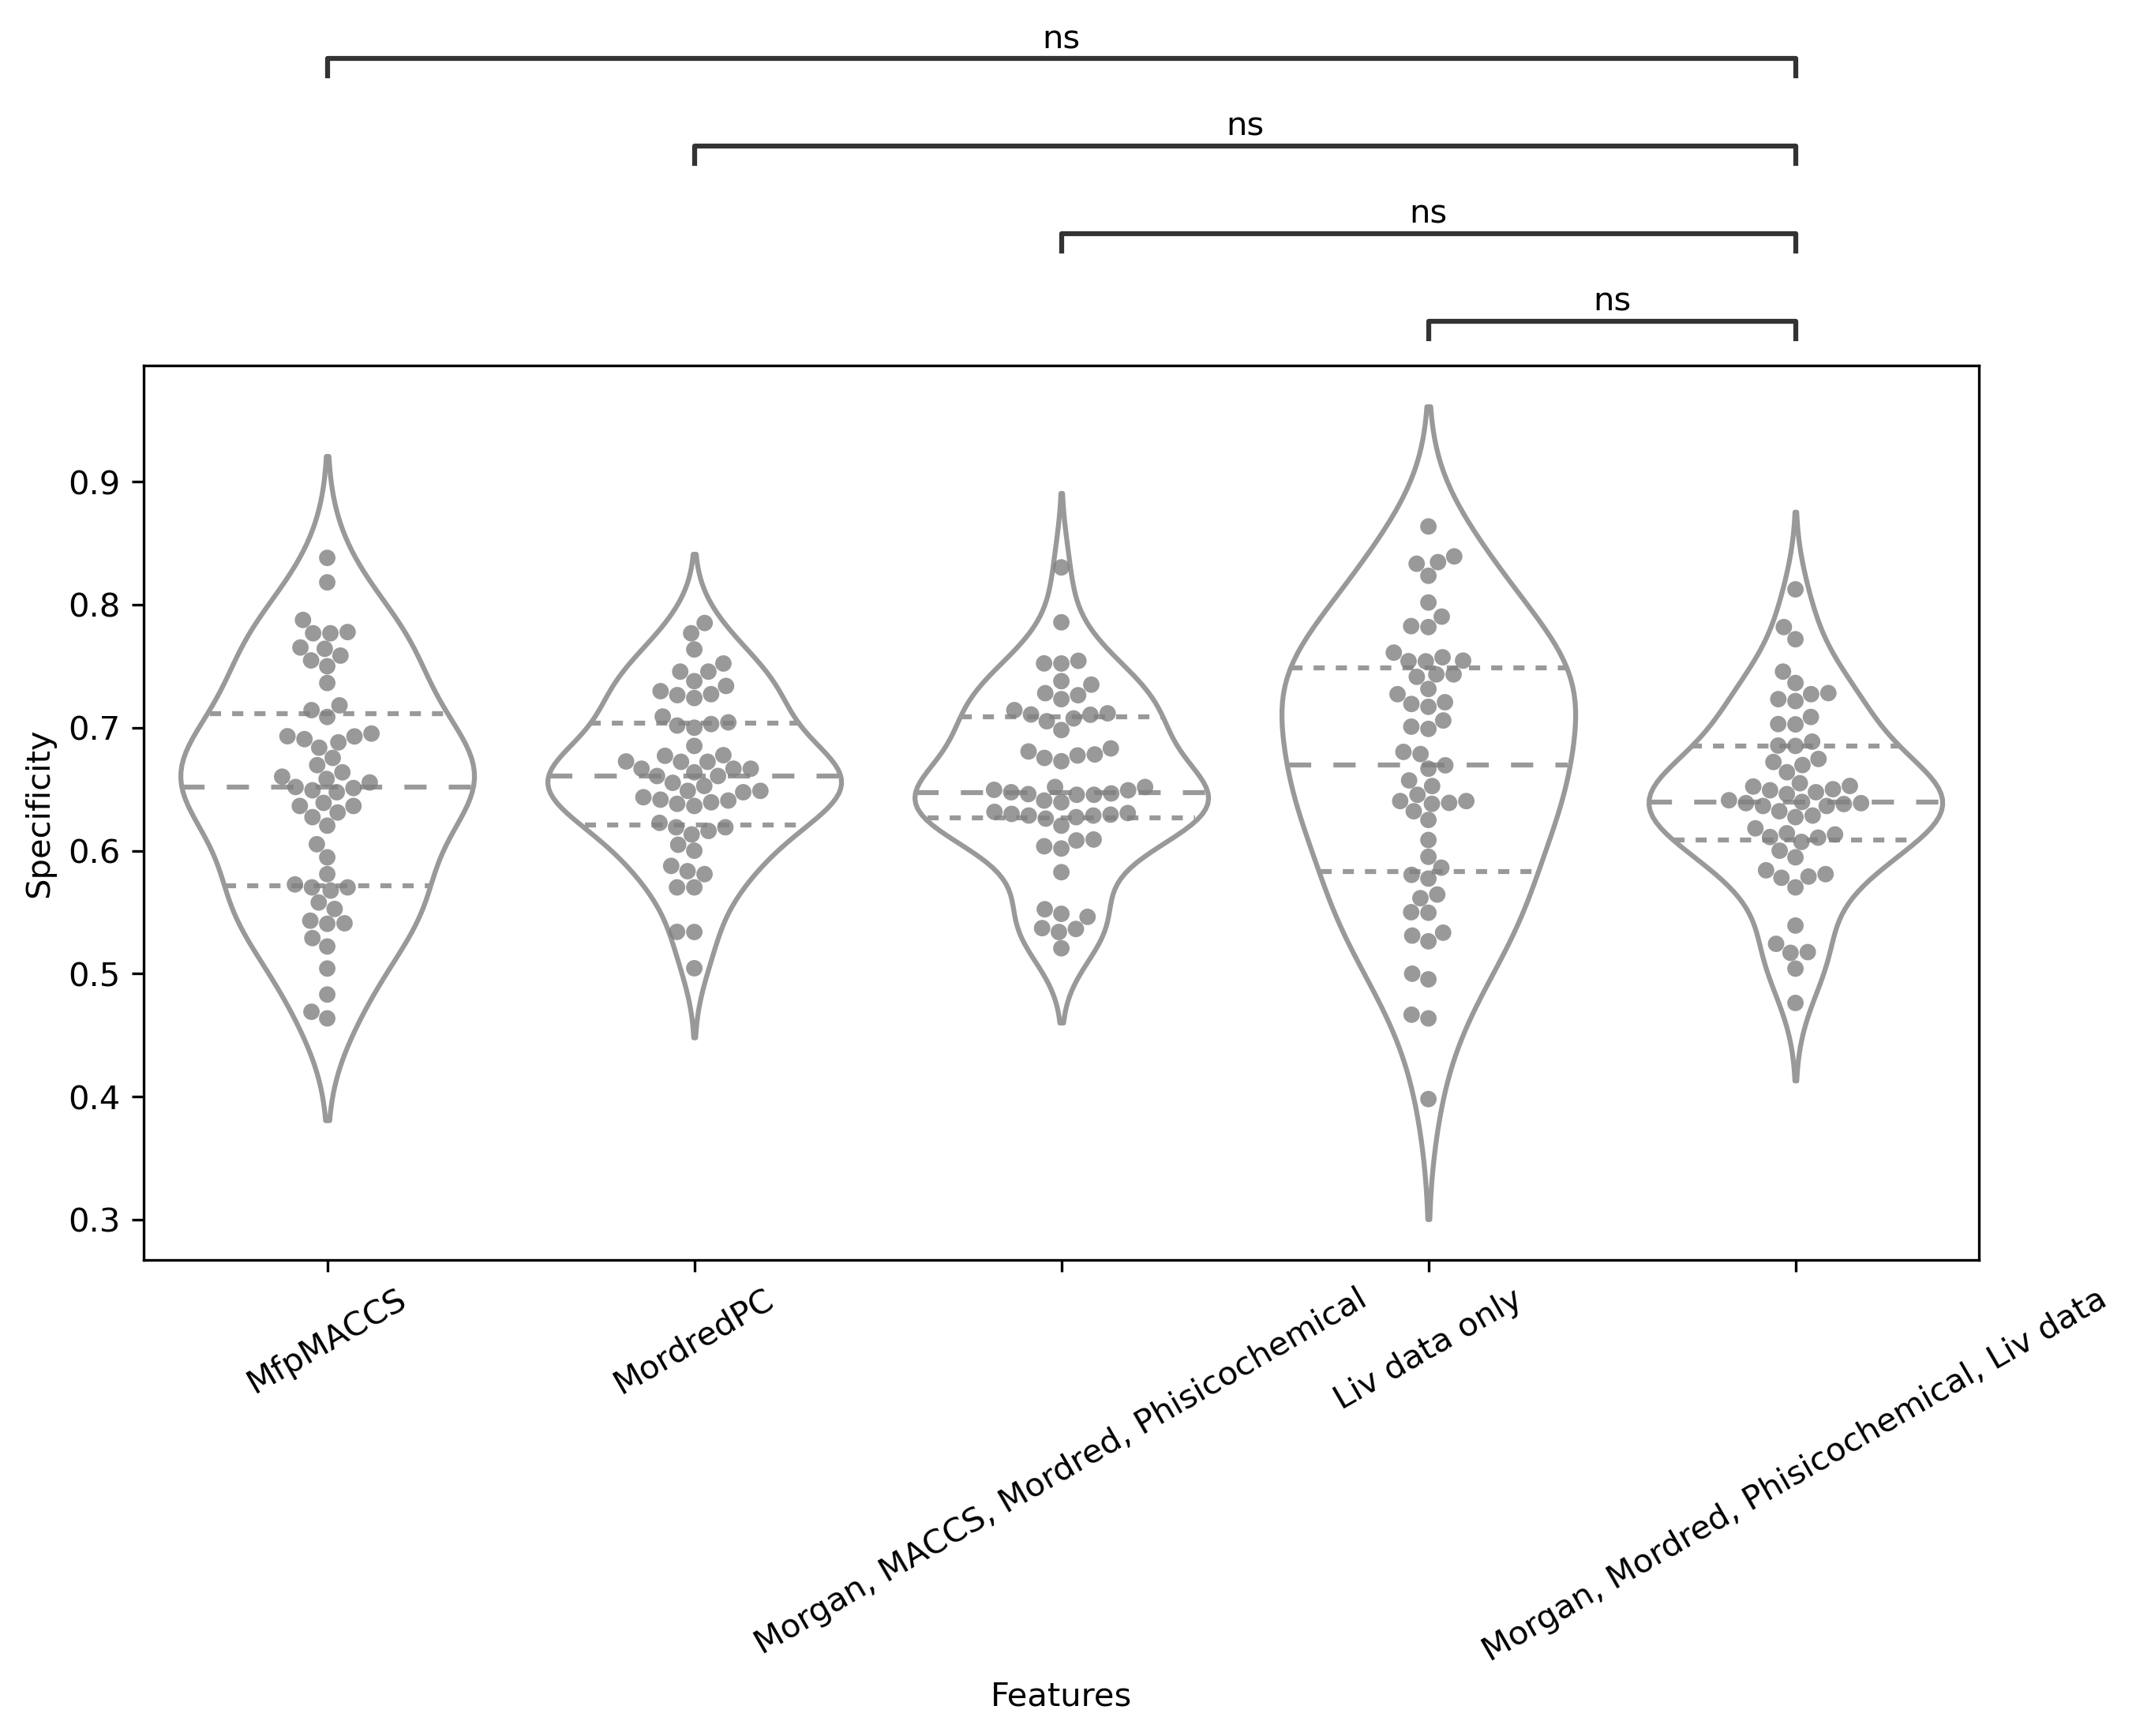

f1
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:6.913e-01 t=-3.992e-01
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:5.539e-01 t=5.957e-01
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.309e-01 t=1.534e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:4.186e-01 t=-8.152e-01


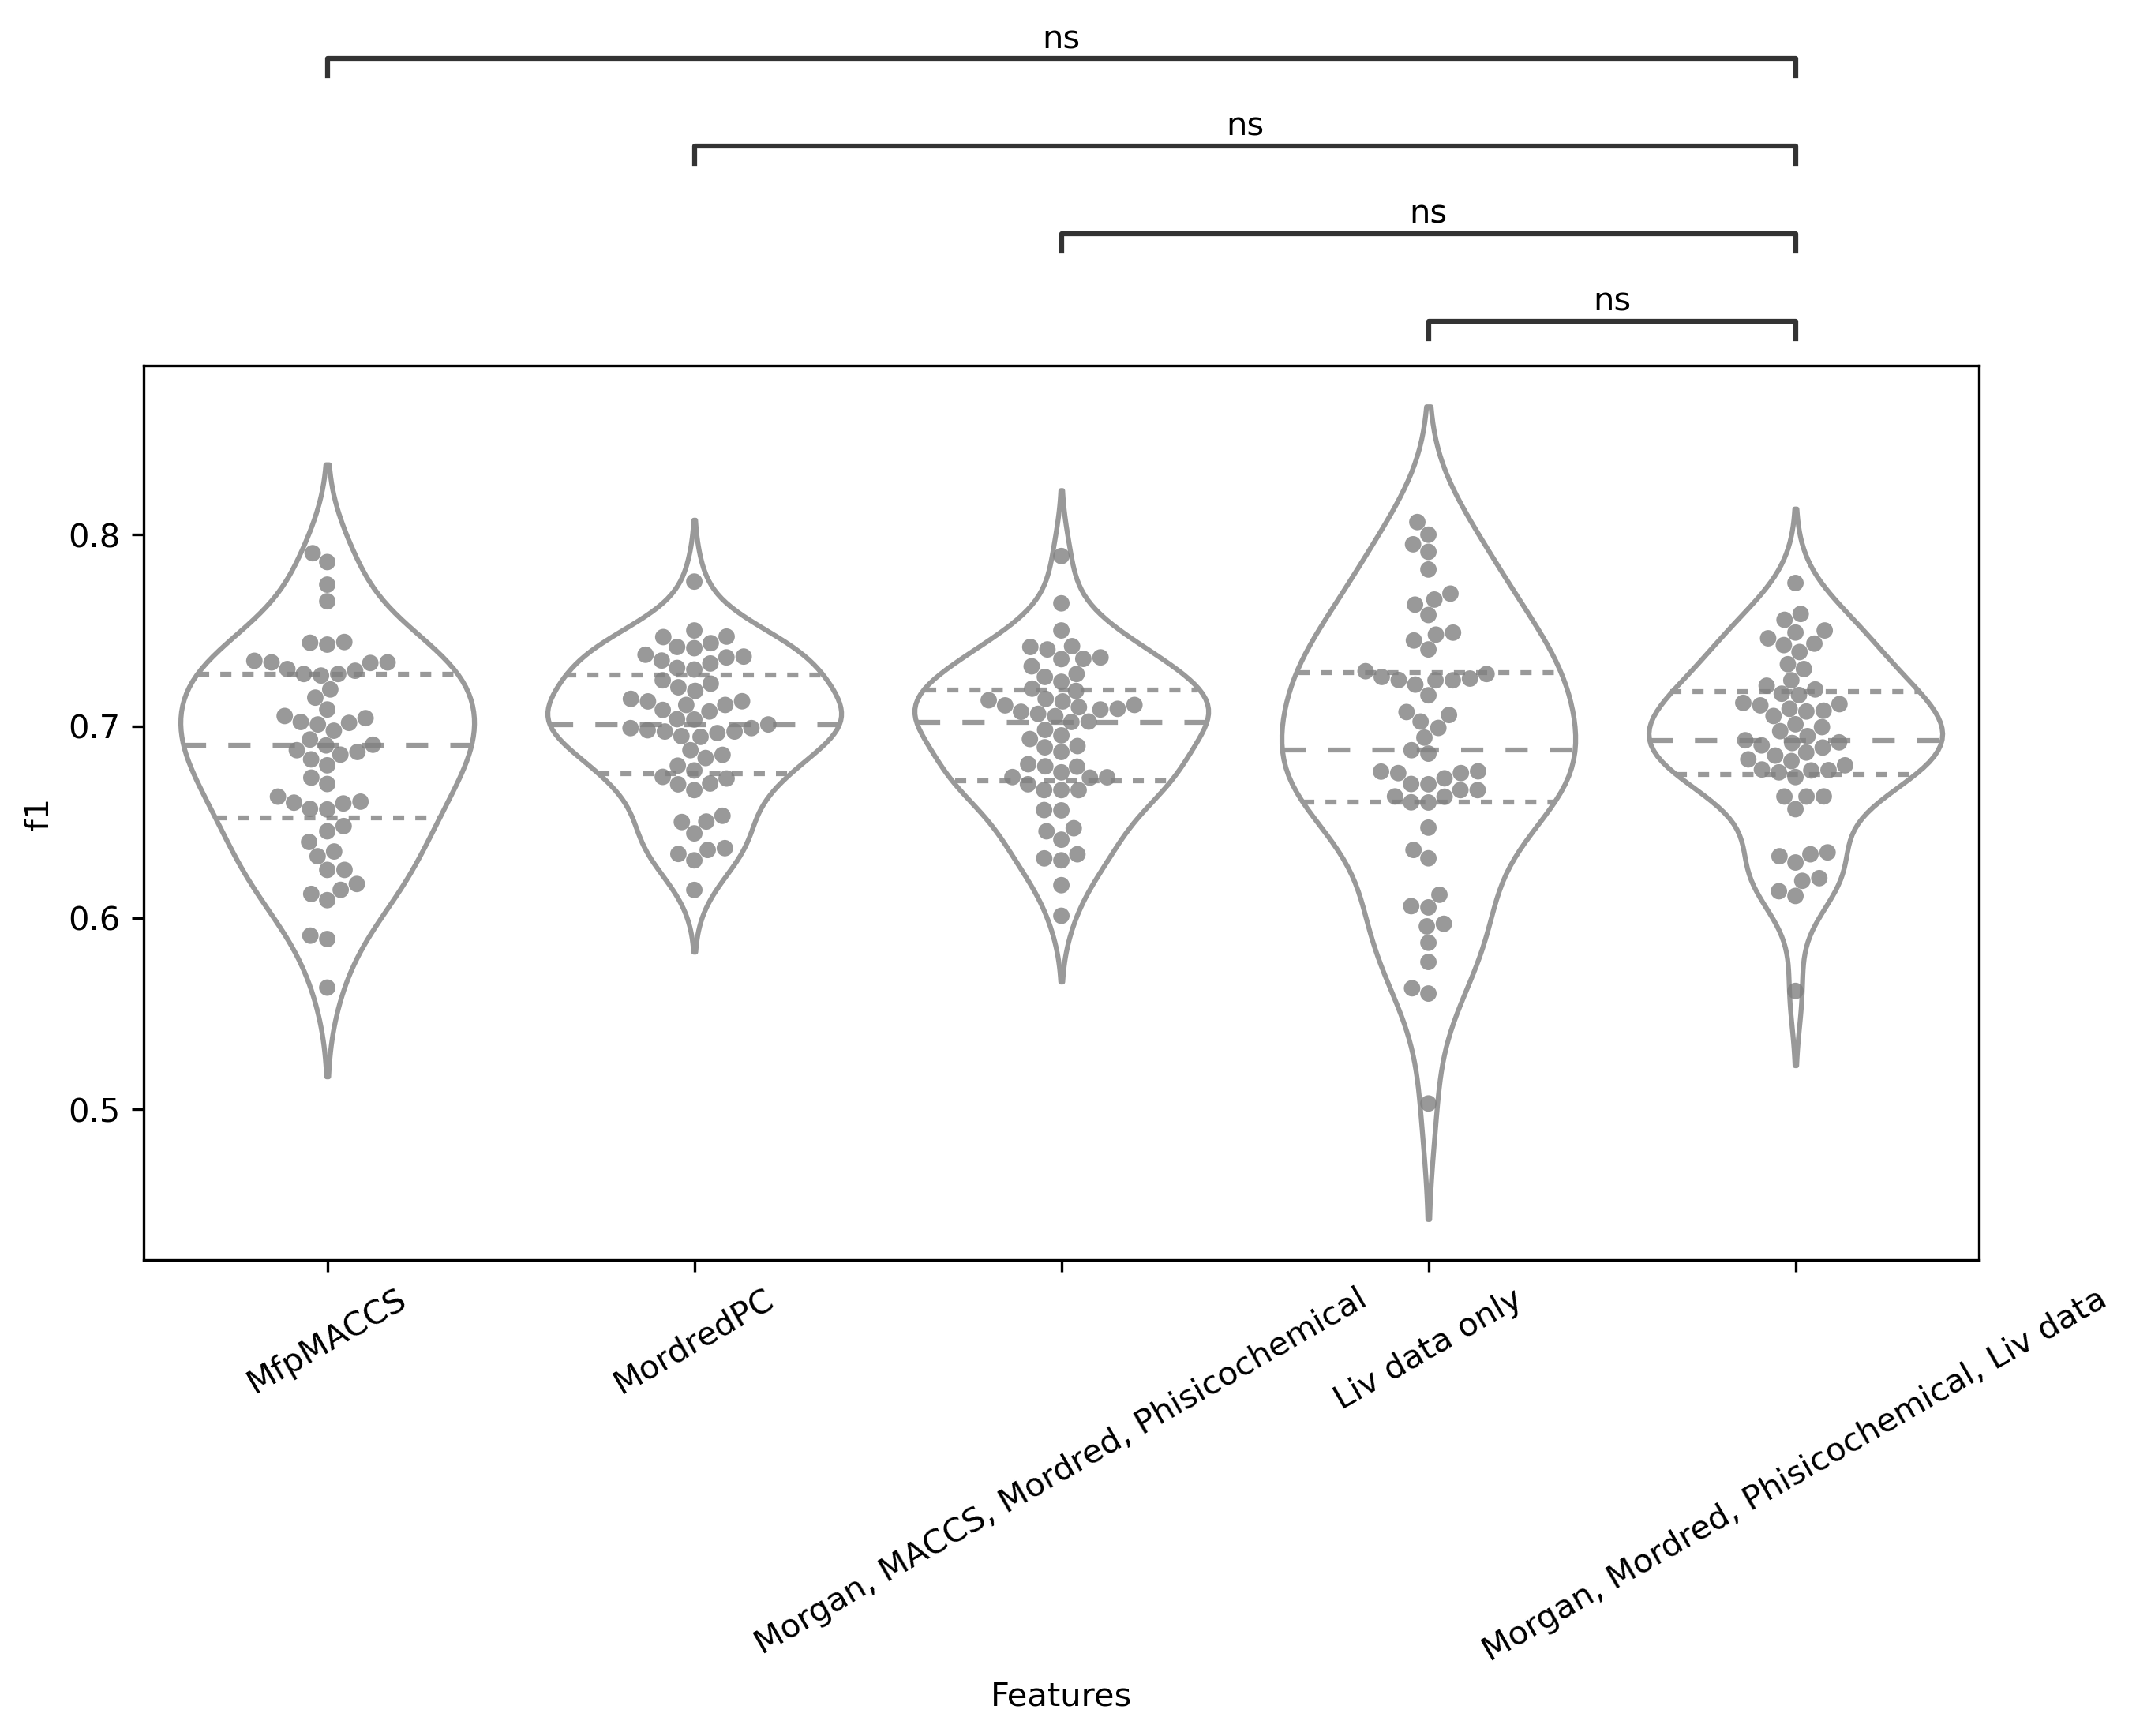

pos_LR
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:2.137e-01 t=-1.258e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:3.187e-01 t=-1.006e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:7.773e-01 t=-2.842e-01
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.562e-01 t=-1.438e+00


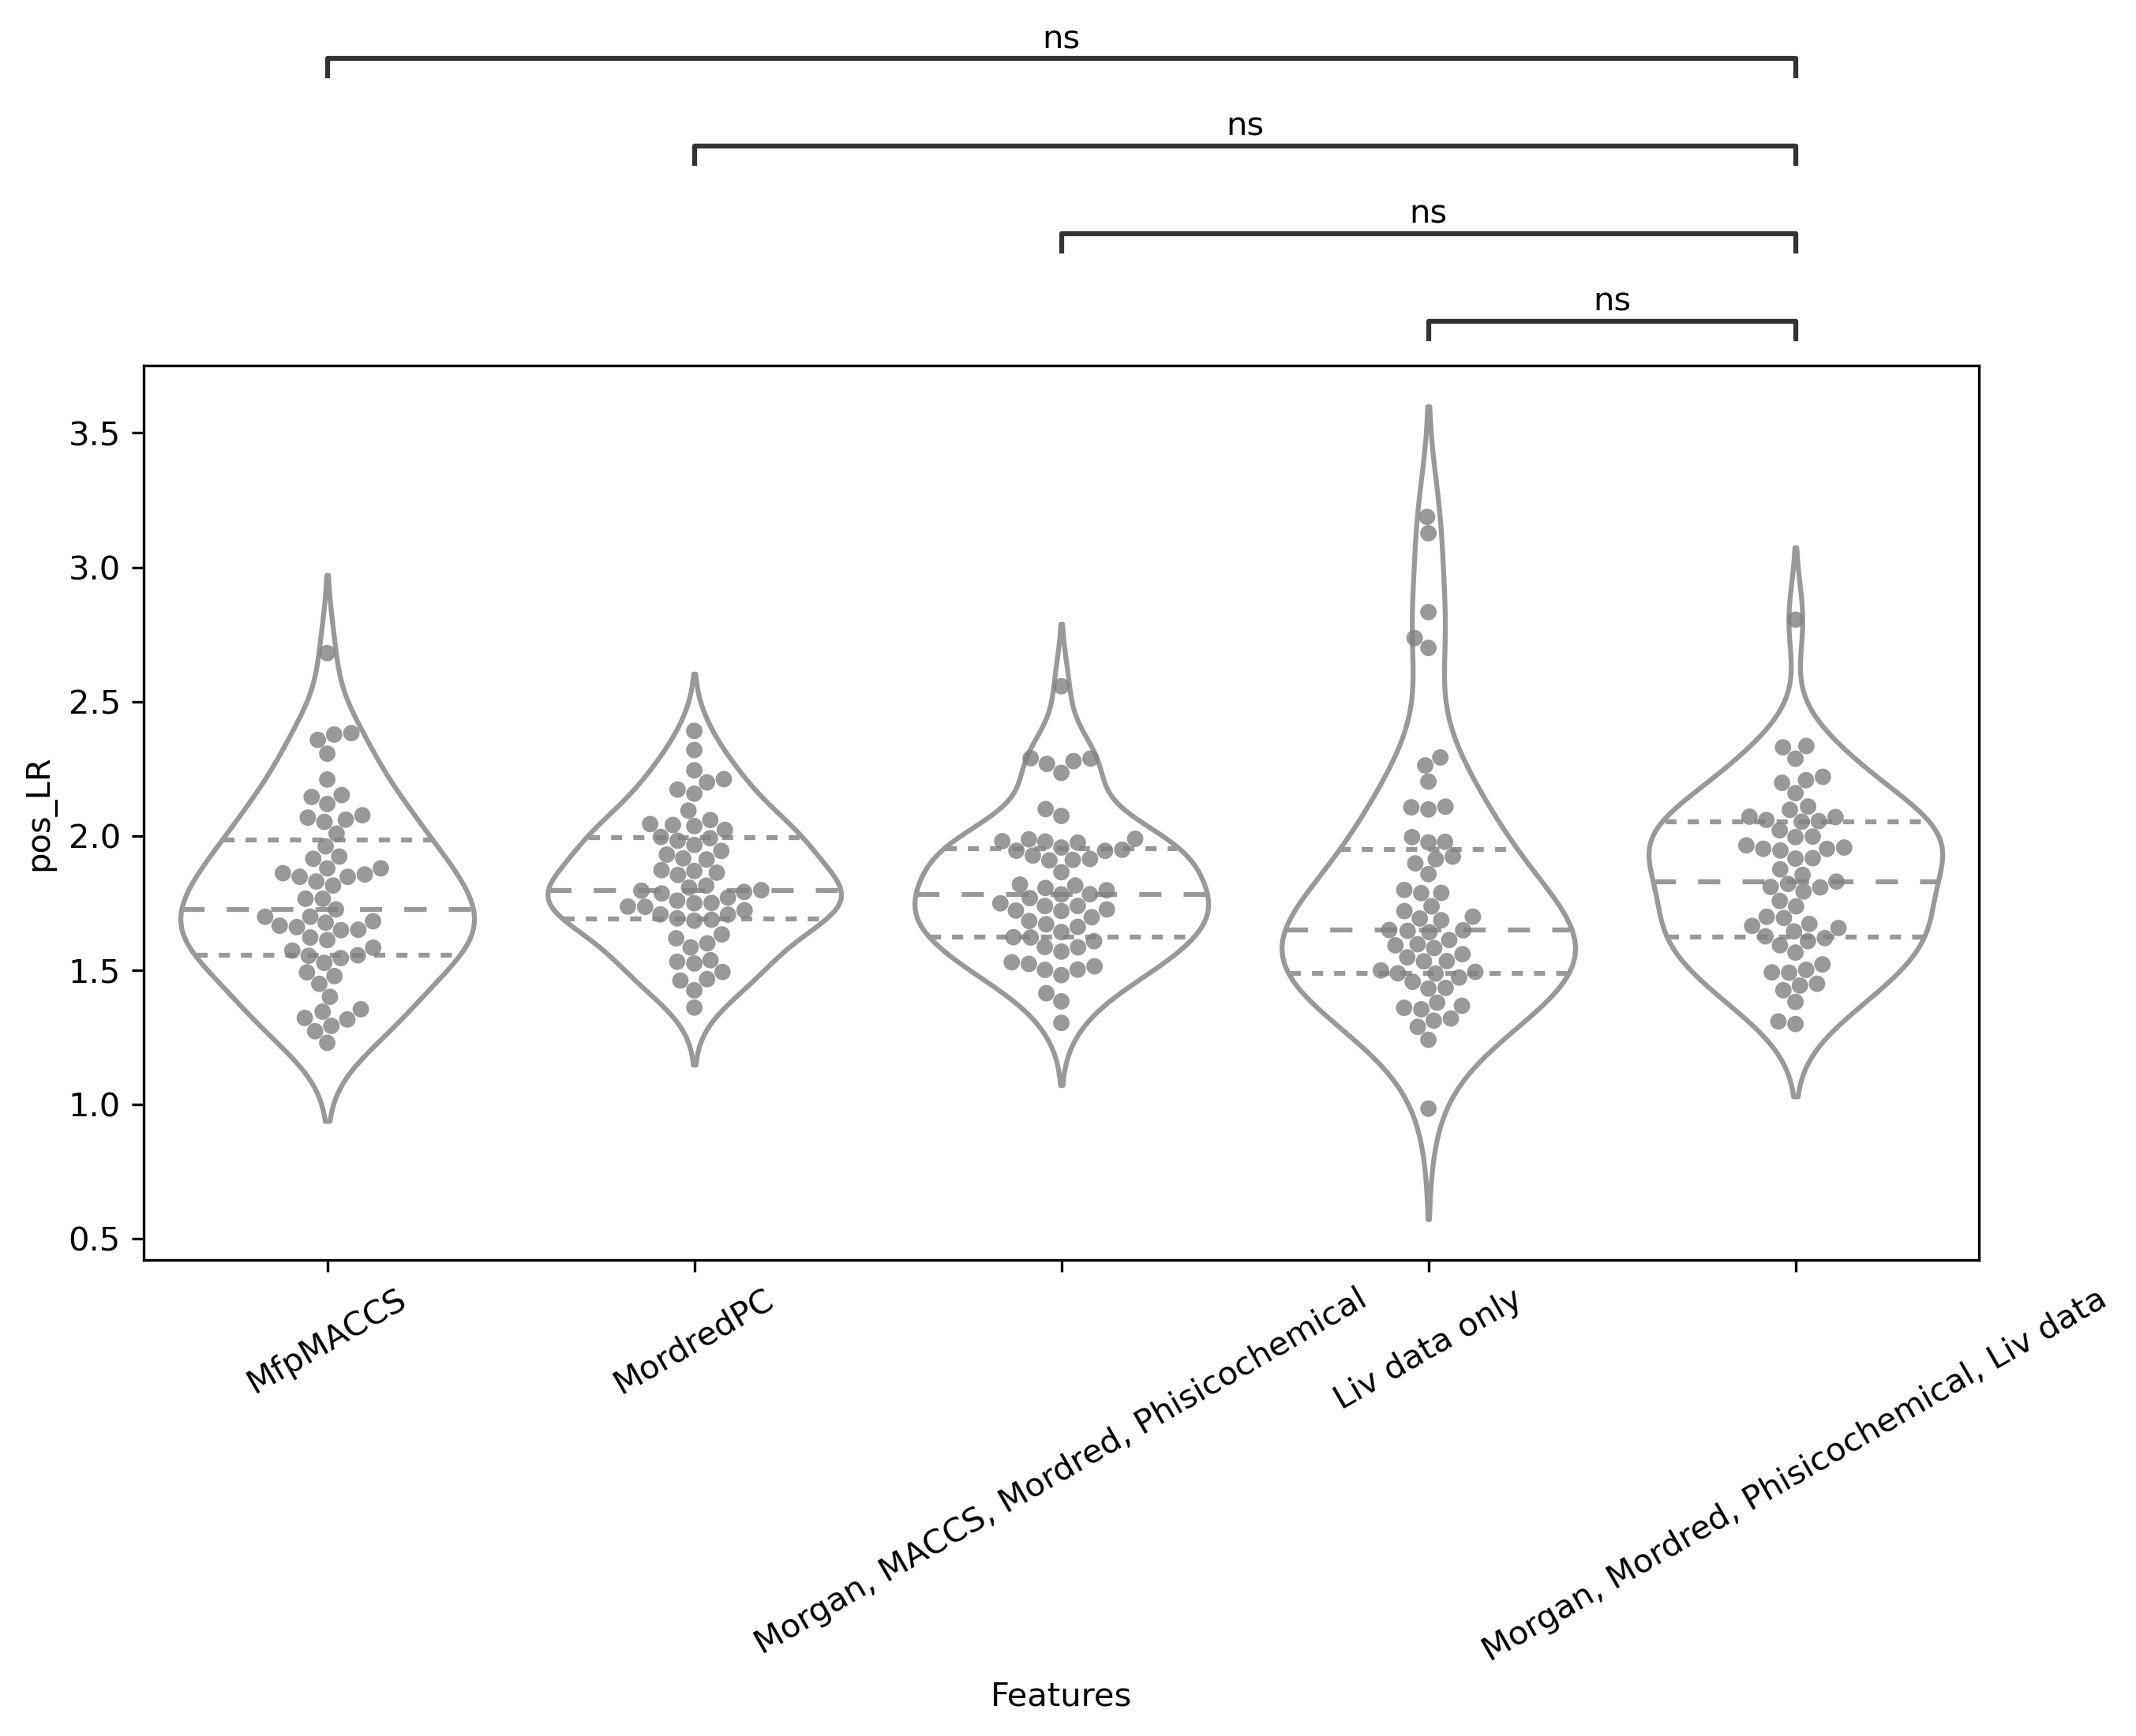

ppv
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:4.720e-11 t=-8.199e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:3.040e-03 t=-3.104e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.168e-02 t=-2.610e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:4.432e-03 t=-2.970e+00


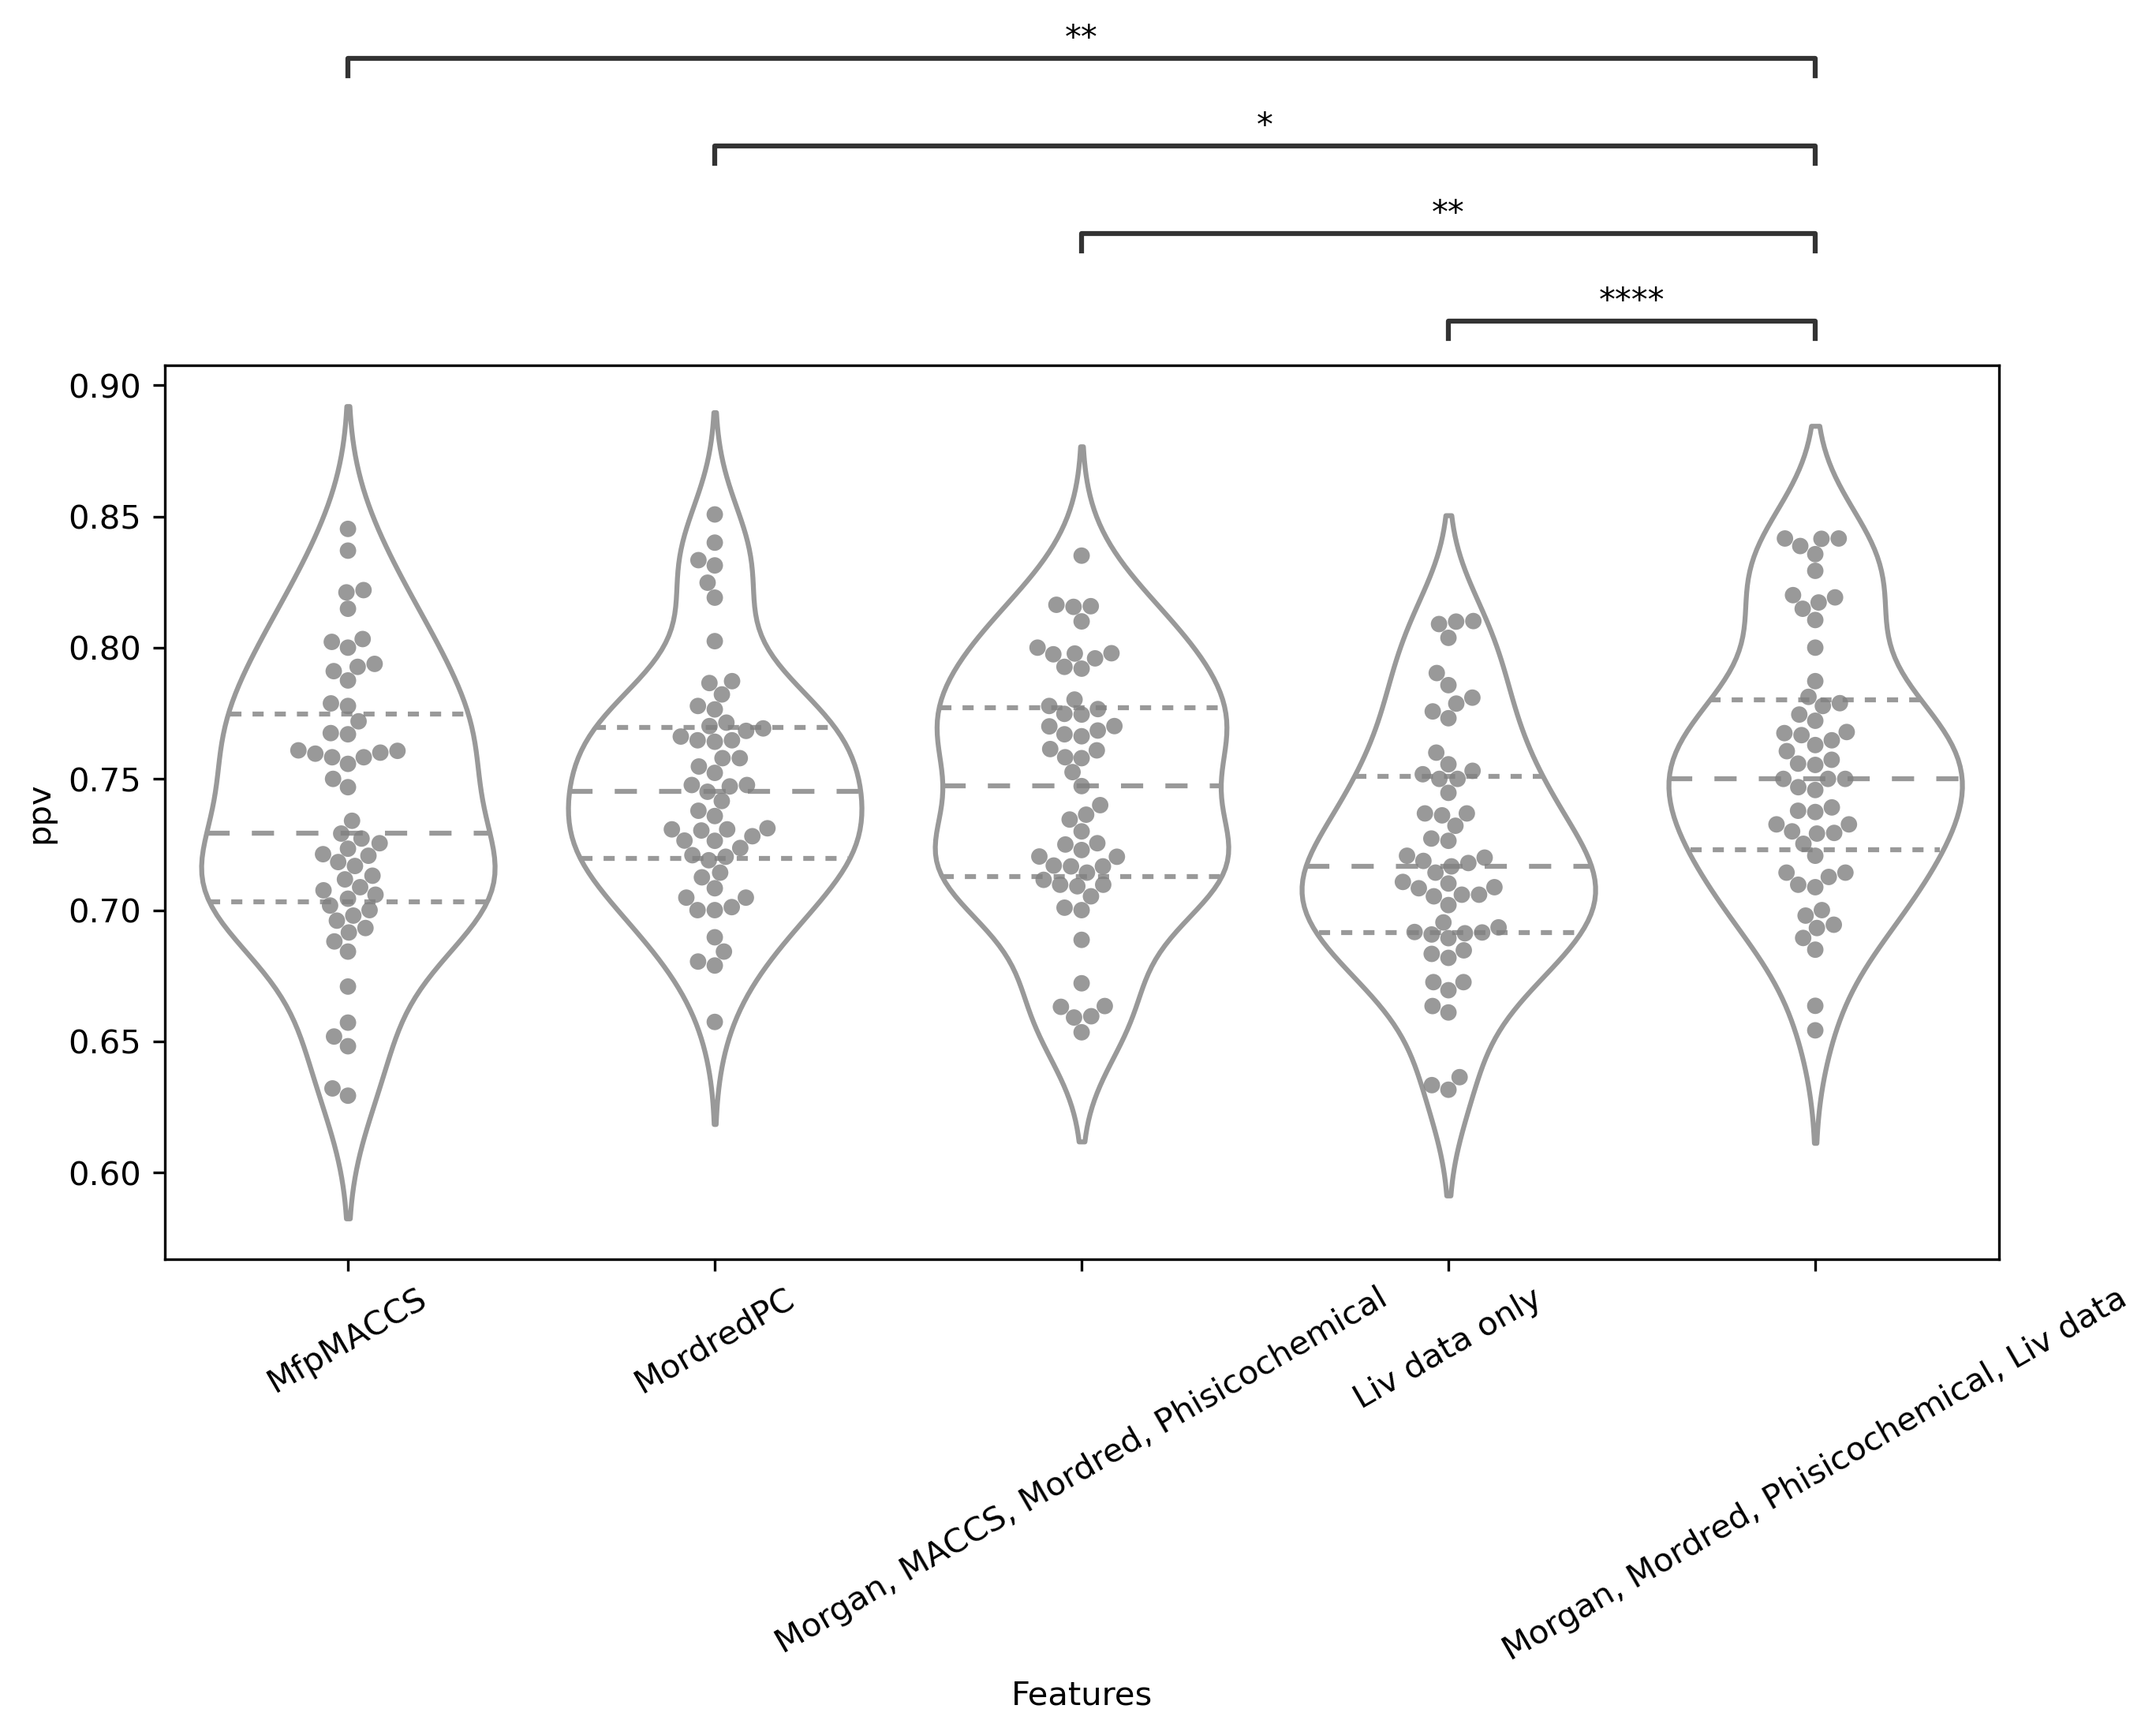

average_precision_score
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:7.041e-02 t=-1.846e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:8.696e-01 t=-1.649e-01
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:9.987e-01 t=-1.605e-03
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:9.288e-01 t=-8.973e-02


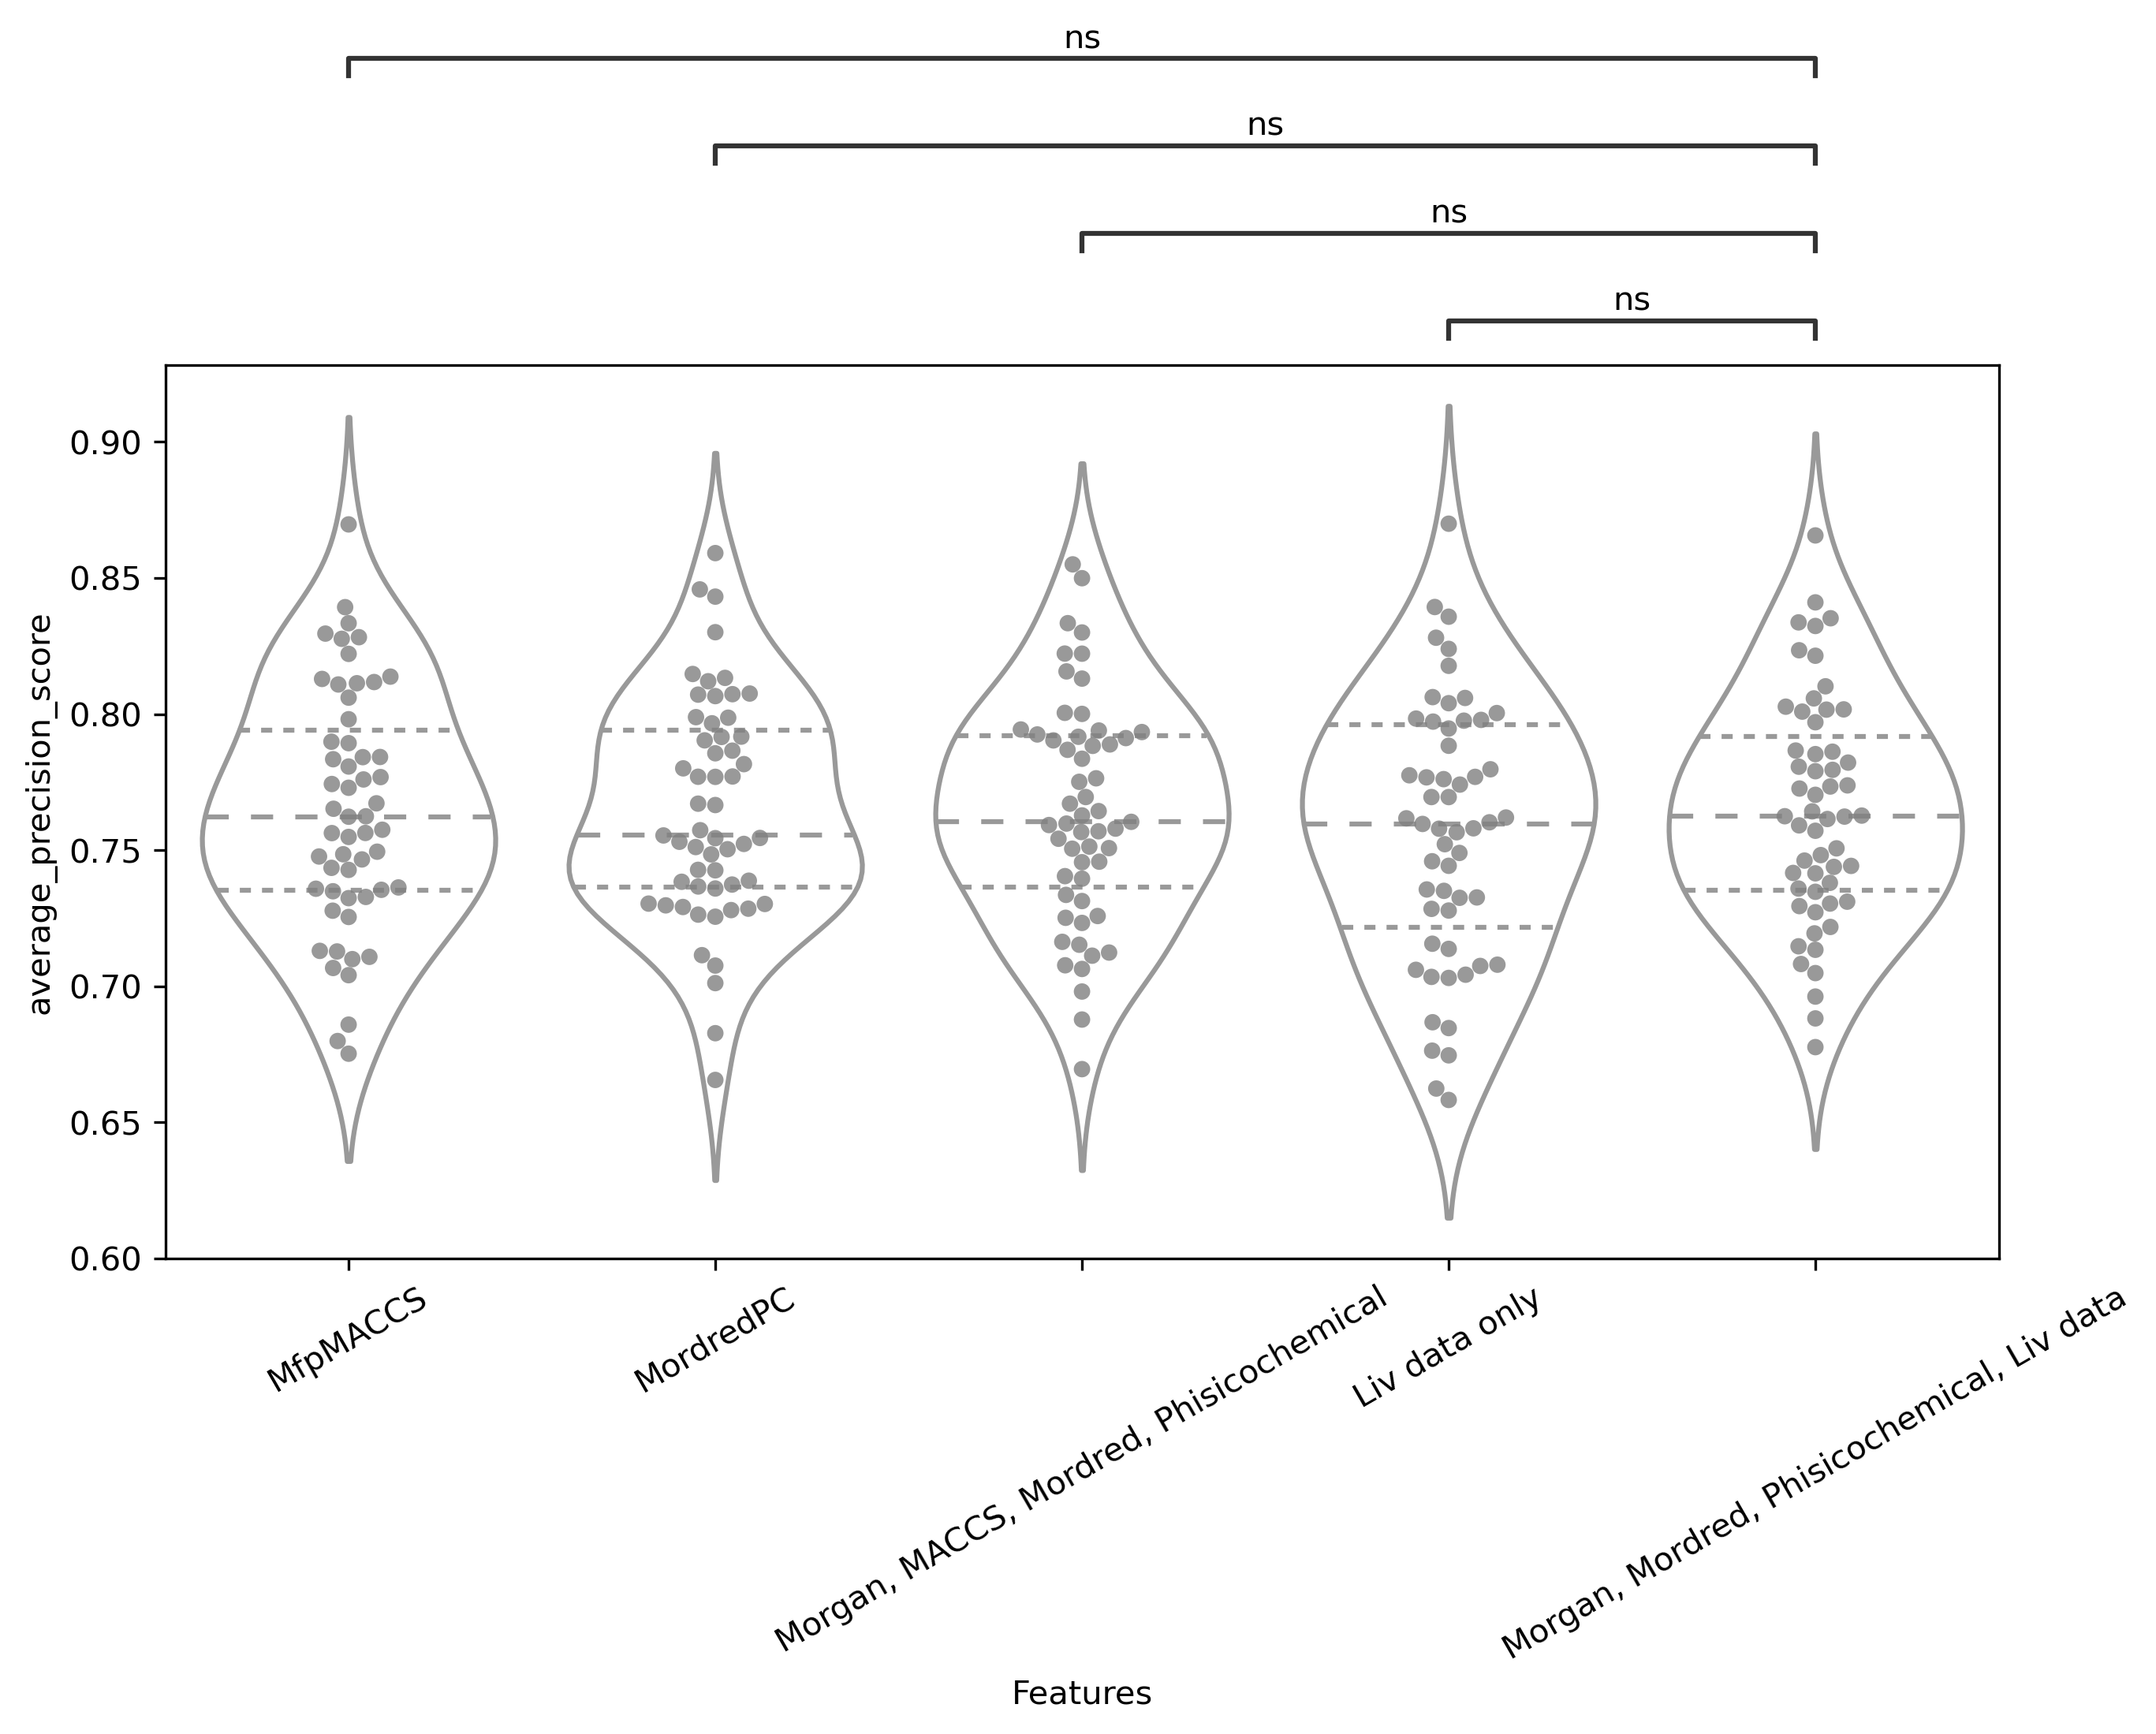

In [15]:
for metric in ["ba", "auc", "mcc", "Sensitivity", "Specificity", "f1", "pos_LR", "ppv", "average_precision_score"]:

    print(metric)
    endpoint="DILI"
    print(endpoint)
    
    pairs= [('Morgan, Mordred, Phisicochemical, Liv data', "MordredPC"),
            ('Morgan, Mordred, Phisicochemical, Liv data', "Morgan, MACCS, Mordred, Phisicochemical"),
            ('Morgan, Mordred, Phisicochemical, Liv data', 'MfpMACCS'),
            ('Morgan, Mordred, Phisicochemical, Liv data', 'Liv data only')]

    my_order= ["MfpMACCS",
                "MordredPC",
               "Morgan, MACCS, Mordred, Phisicochemical",
                "Liv data only",
                "Morgan, Mordred, Phisicochemical, Liv data"]


    fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

    g = sns.violinplot(ax=ax,x='Features', y=metric, data=df, scale='width', inner='quartile', order=my_order, color="white")
    g = sns.swarmplot(ax=ax,x='Features', y=metric, data=df, order=my_order,color="grey", alpha=0.8)
    g.set_xticklabels(g.get_xticklabels(), rotation=30)        
        
    annotator = Annotator(ax=ax, pairs = pairs, data=df, x="Features", y=metric, order=my_order)
    annotator.configure(test='t-test_paired', text_format='star', loc='outside')
    annotator.apply_and_annotate()

    plt.show()
